# Module 4.1 — Gambler’s Ruin: Why Fair Games Still Kill Players
### *Here, we remove the edge entirely.*

This module asks a harsher question:

> What happens if the game is perfectly fair — and you simply keep playing?

There is no mistake to correct, no skill to improve, no expectancy to “unlock.”      
Only time, capital, and repetition.

### Simulation Setup
- 50/50 win–loss game
- Fixed bet size
- Finite capital
- Hard ruin threshold
- Many independent paths
- No leverage, no scaling, no tricks

This is the cleanest possible environment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
start_capital = 100
capital_thres = 0    # complete account blowout
n_trades = 10_000
n_paths = 1000

p = 0.5               # fair game
win = 1
loss = -1

states = []             # alive / dead
survival_times = []     # trades survived
final_capitals = []   

# ----- Stateful simulation (loop required) -----
for _ in range(n_paths):
    capital = start_capital
    time_alive = 0

    outcomes = np.where(
        np.random.rand(n_trades) < p,
        win,
        loss
    )

    for outcome in outcomes:
        if capital <= capital_thres:
            break
        capital += outcome
        time_alive += 1
   
    states.append('dead' if capital <= capital_thres else 'alive')
    survival_times.append(time_alive)
    final_capitals.append(capital)

# ----- Simple diagnostics -----
dead_rate = states.count('dead') / n_paths
print(f"Ruin rate: {dead_rate:.2%}")
print(f"Median survival time: {np.median(survival_times)} trades")
print(f"Max survival time: {np.max(survival_times)} trades")

Ruin rate: 31.80%
Median survival time: 10000.0 trades
Max survival time: 10000 trades


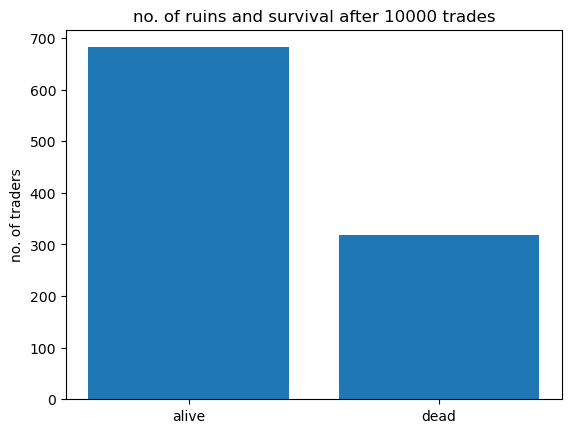

In [3]:
x, y = np.unique(states, return_counts = True)
plt.figure()
plt.bar(x = x, height = y)
plt.ylabel('no. of traders')
plt.title(f'no. of ruins and survival after {n_trades} trades')
plt.show()

In [4]:
def ruin_rate_over_horizon(n_trades):
    states = []

    for _ in range(n_paths):
        capital = start_capital

        outcomes = np.where(
            np.random.rand(n_trades) < p,
            win,
            loss
        )

        for outcome in outcomes:
            if capital <= capital_thres:
                break
            capital += outcome

        states.append(capital <= capital_thres)

    return np.mean(states)*100


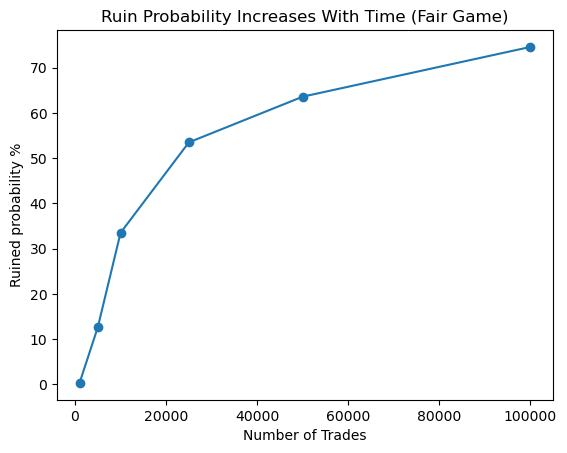

In [5]:
trade_horizons = [1_000, 5_000, 10_000, 25_000, 50_000, 100_000]
ruin_rates = [ruin_rate_over_horizon(n) for n in trade_horizons]

plt.figure()
plt.plot(trade_horizons, ruin_rates, marker='o')
plt.xlabel("Number of Trades")
plt.ylabel("Ruined probability %")
plt.title("Ruin Probability Increases With Time (Fair Game)")
plt.show()


# Observation
#### Across repeated simulations of a pure 50/50 system with finite capital, ruin emerges not as an exception, but as a statistical certainty given enough time. Even with no disadvantage, many paths terminate early, while others survive long enough to create the illusion of safety. As the number of trades increases, the fraction of ruined paths grows monotonically, confirming that time itself acts as cumulative exposure to risk.

#### Winning streaks appear frequently and can persist for long periods, yet they do not alter the eventual outcome. Survival at any finite horizon does not imply robustness — it only means ruin has not occurred yet. The system does not fail because it is unfair; it fails because it is continuously engaged.

#### The critical insight is that longevity without an edge is mathematically incompatible with survival. Activity does not compound progress; it compounds vulnerability. In a fair game with finite capital, continued participation guarantees eventual destruction, regardless of discipline, patience, or recent success.